<a href="https://colab.research.google.com/github/beaamoo/Machine-Learning-Demonstration/blob/main/kNN-classifier-demonstration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training & Prediction for kNN Classifier Model

##Importing Libraries

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

## Loading Data

Iris data is useful for machinelearning demonstration. Below is a look at independent variables of iris.

In [2]:
#load ioris data
data = load_iris()

#independent variables of iris
print(data.data[:8])
print(data.feature_names)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
#Target values of Iris
print(data.target[:10])
print(data.target_names)

[0 0 0 0 0 0 0 0 0 0]
['setosa' 'versicolor' 'virginica']


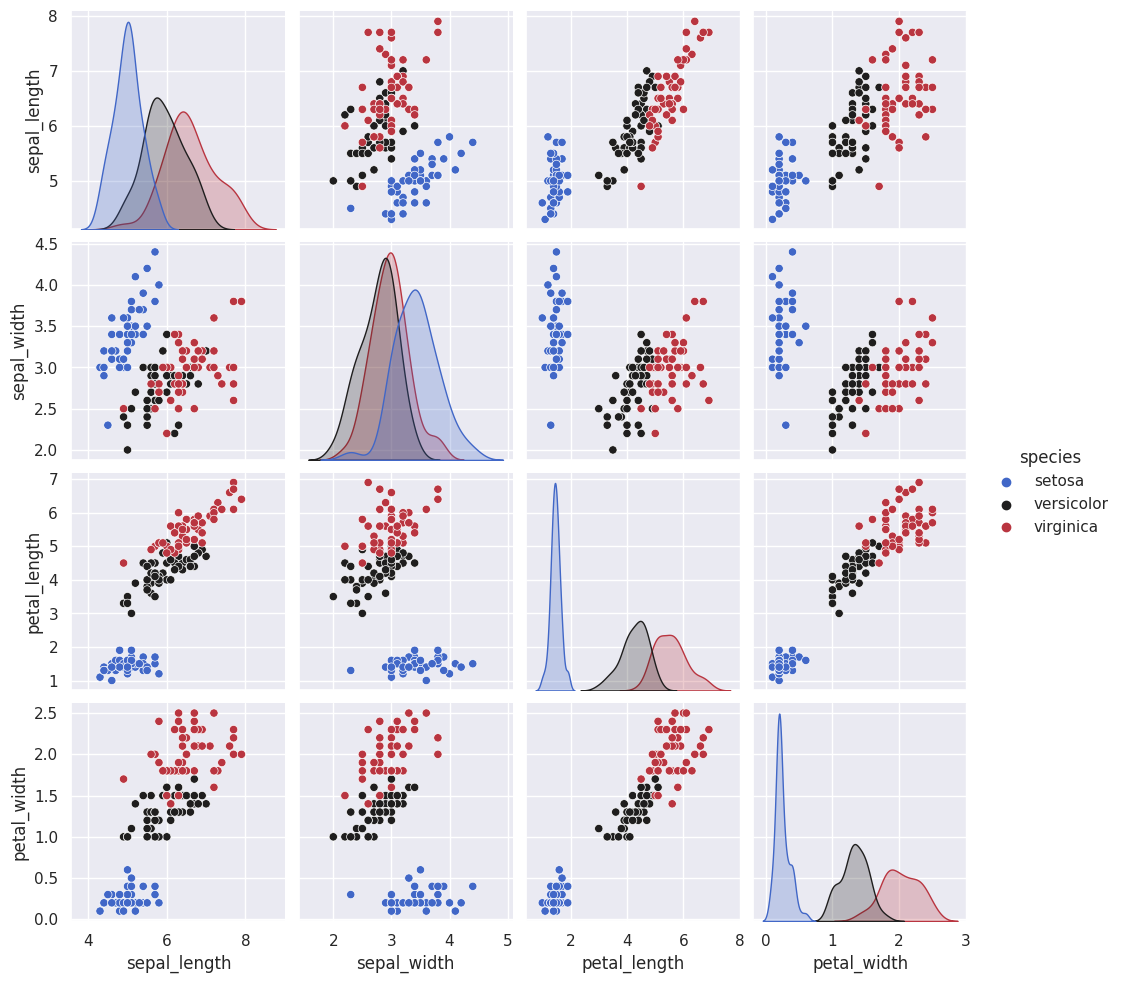

In [4]:
# iris feature-class relations as well as correlations visualized
# Iris Dataset Scatter Matrix with Seaborn
sns.set_theme(style="darkgrid")

df = sns.load_dataset("iris")
sns.pairplot(df, hue="species", palette="icefire")
plt.show()

## Train Test Split

In [5]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)

## Building KNeighbour Classifier Model

Create a kNN classifier and then train it before using it for prediction tasks. While creating a kNN model it’s possible to take the default values which usually yield satisfactory results initially. But, it’s also possible to create a model with specific parameter values to make it more suitable for the needs and expectations from the machine learning or data science projects.

In [6]:
KNN = KNeighborsClassifier()

Here is a more custom kNN model created by optimizing some of the hyperparameters of the model.

In [7]:
KNN = KNeighborsClassifier(n_neighbors= 10, weights = "distance")

##Training kNN Classifier Model

In [8]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

## Prediction of kNN Classifier Model

Make a prediction using the test partition of data without target values to then compare the model’s output (yhat) with target values that we already have (y_test) and see how the model is performing.

In [9]:
yhat=KNN.predict(X_test)

print (yhat [0:15])
print (y_test [0:15])

[1 0 1 2 0 1 1 1 2 2 1 2 0 1 1]
[2 0 1 2 0 1 1 1 2 2 1 2 0 1 1]


## kNN Visualization



In [10]:
#Creating meshgrid and Z values
X_train[:,0:2].reshape(120,2)

array([[5.1, 3.4],
       [6.7, 3.3],
       [5.7, 2.5],
       [6.4, 3.2],
       [4.9, 3.6],
       [6.6, 3. ],
       [7.1, 3. ],
       [5.1, 3.8],
       [5.6, 2.5],
       [5.8, 2.7],
       [6.3, 3.4],
       [5.4, 3.4],
       [6.8, 2.8],
       [6.5, 3. ],
       [4.3, 3. ],
       [4.8, 3.1],
       [6.8, 3.2],
       [6.7, 3.1],
       [4.4, 3.2],
       [4.8, 3. ],
       [6.3, 2.7],
       [6.1, 2.6],
       [5.7, 4.4],
       [5.6, 3. ],
       [6.9, 3.1],
       [6.3, 2.5],
       [6.1, 2.9],
       [6.7, 3.1],
       [7.7, 3. ],
       [5.3, 3.7],
       [5.9, 3. ],
       [6.4, 2.8],
       [7.6, 3. ],
       [4.8, 3.4],
       [4.7, 3.2],
       [5. , 2.3],
       [6.3, 2.5],
       [5.4, 3.9],
       [5.7, 2.6],
       [6.5, 3.2],
       [5.1, 3.3],
       [4.4, 2.9],
       [5. , 3.6],
       [4.5, 2.3],
       [5.8, 2.6],
       [6.7, 3. ],
       [5.5, 2.4],
       [4.9, 3. ],
       [6.9, 3.1],
       [5.5, 2.3],
       [5.5, 3.5],
       [6.7, 3. ],
       [5.8,

In [11]:

#  = X_train.reshape(240,2)[:120,:]
X = X_train[:,0:2].reshape(120,2)
y = y_train

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X, y)

X1min, X1max = X[:, 0].min() - 1, X[:, 0].max() + 1
X2min, X2max = X[:, 1].min() - 1, X[:, 1].max() + 1
step = 0.01
X1, X2 = np.meshgrid(np.arange(X1min, X1max, step), 
                      np.arange(X2min, X2max, step))

Z = clf.predict(np.c_[X1.ravel(), X2.ravel()])
Z = Z.reshape(X1.shape)

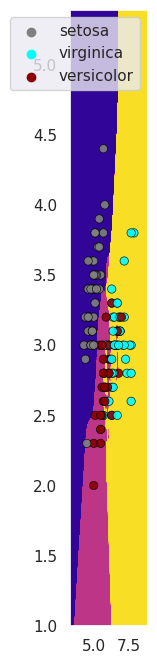

In [12]:
# Creating contourf plot for regions and scatterplot for samples points
cmap_dots = ['gray', 'cyan', 'darkred']

plt.figure(figsize=(1, 8))
plt.contourf(X1, X2, Z, cmap="plasma")

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=data.target_names[y],
                palette=cmap_dots, alpha=0.9, edgecolor="black")
plt.show()

## Evaluation of kNN Classifier Model

In [14]:
# evaluate the accuracy of kNN
print("kNN Accuracy is: ", metrics.accuracy_score(y_test, yhat))

kNN Accuracy is:  0.9666666666666667


If model accuracy is not satisfactory for project criteria, tuning can be an option.